In [185]:
import numpy as np

def convert_fasor_to_rectangular(magnitude, phase):
    import math
    real = magnitude * math.cos(phase)
    imaginary = magnitude * math.sin(phase)
    return real+imaginary*1j

In [186]:
# Impedancias

z = 86.44
theta = 11.5*np.pi/180

zbn = zcn = convert_fasor_to_rectangular(z, theta)
zan = convert_fasor_to_rectangular(z/10, theta)

# Crear la matriz de impedancias
A = np.array([[zan+zbn, -zbn], [-zbn, zbn+zcn]])
print("Matriz de impedancias:\n", A)

# Calcular la inversa de la matriz
A_inv = np.linalg.inv(A)

# Crear el vector de tensiones (corregido)
V = np.array([convert_fasor_to_rectangular(208, 30*np.pi/180), convert_fasor_to_rectangular(208, -90*np.pi/180)])
print("Vector de tensiones:\n", V.transpose())
# Calcular las corrientes
I = np.dot(A_inv, V)

print("Corrientes:")
print(I)

# Calcular las corrientes en coordenadas polares
I_magnitudes = np.abs(I)
I_phases = np.angle(I)

print("Corrientes en coordenadas polares:")
print(I_magnitudes)
print(I_phases*180/np.pi)

I1 = I[0]
I2 = I[1]-I[0]
I3 = -I[1]

print("Corrientes de fase:")
print(np.abs(I1), np.angle(I1)*180/np.pi)
print(np.abs(I2), np.angle(I2)*180/np.pi)
print(np.abs(I3), np.angle(I3)*180/np.pi)

Matriz de impedancias:
 [[ 93.17516061+18.95670068j -84.70469147-17.23336425j]
 [-84.70469147-17.23336425j 169.40938293+34.4667285j ]]
Vector de tensiones:
 [1.80133284e+02+104.j 1.27363267e-14-208.j]
Corrientes:
[3.40346011-0.69244179j 1.46186118-1.52521406j]
Corrientes en coordenadas polares:
[3.47318533 2.11265616]
[-11.5        -46.21500395]
Corrientes de fase:
3.4731853306178326 -11.5
2.1126561589863586 -156.7849960460518
2.1126561589863586 133.7849960460518


Valores límite:
I: 1.389274132247133 -11.500000000000002
V: 120.08885599144217 -3.390081418182066e-15


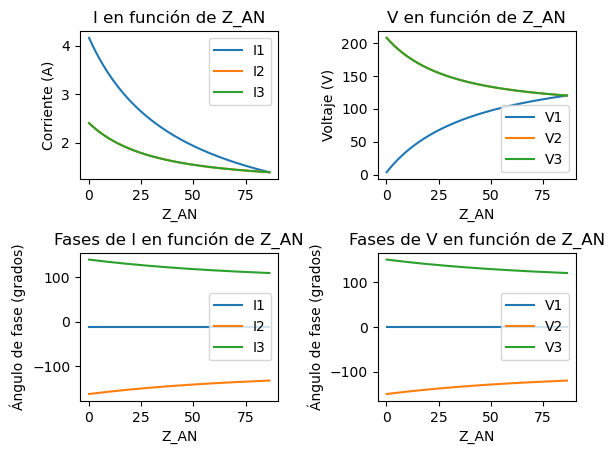

In [187]:
# Hacer el ejercicio para valores de zan entre 1 y 100 % de zbn
z_vect = z*np.linspace(0.001, 1, 1000)
zan = convert_fasor_to_rectangular(z, theta)
zan_vect = zan*np.linspace(0.01, 1, 1000)
I = np.zeros((1000, 2), dtype=complex)

for i in range(1000):
    zan = convert_fasor_to_rectangular(z_vect[i], theta)
    A = np.array([[zan+zbn, -zbn], [-zbn, zbn+zcn]])
    A_inv = np.linalg.inv(A)
    I[i] = np.dot(A_inv, V)

# Calcular las corrientes de fase
I1 = I[:, 0]
I2 = I[:, 1]-I[:, 0]
I3 = -I[:, 1]

# Calcular los voltajes de fase
V1 = I1*zan_vect
V2 = I2*zbn
V3 = I3*zcn

# Graficar en un arreglo 2x2 las magnitudes de las corrientes y los voltajes de fase y sus ángulos
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(z_vect, np.abs(I1), label='I1')
axs[0, 0].plot(z_vect, np.abs(I2), label='I2')
axs[0, 0].plot(z_vect, np.abs(I3), label='I3')
axs[0, 0].set_xlabel('Z_AN')
axs[0, 0].set_ylabel('Corriente (A)')
axs[0, 0].set_title('I en función de Z_AN')
axs[0, 0].legend()

axs[0, 1].plot(z_vect, np.abs(V1), label='V1')
axs[0, 1].plot(z_vect, np.abs(V2), label='V2')
axs[0, 1].plot(z_vect, np.abs(V3), label='V3')
axs[0, 1].set_xlabel('Z_AN')
axs[0, 1].set_ylabel('Voltaje (V)')
axs[0, 1].set_title('V en función de Z_AN')
axs[0, 1].legend()

axs[1, 0].plot(z_vect, np.angle(I1, deg=True), label='I1')
axs[1, 0].plot(z_vect, np.angle(I2, deg=True), label='I2')
axs[1, 0].plot(z_vect, np.angle(I3, deg=True), label='I3')
axs[1, 0].set_xlabel('Z_AN')
axs[1, 0].set_ylabel('Ángulo de fase (grados)')
axs[1, 0].set_title('Fases de I en función de Z_AN')
axs[1, 0].legend()

axs[1, 1].plot(z_vect, np.angle(V1, deg=True), label='V1')
axs[1, 1].plot(z_vect, np.angle(V2, deg=True), label='V2')
axs[1, 1].plot(z_vect, np.angle(V3, deg=True), label='V3')
axs[1, 1].set_xlabel('Z_AN')
axs[1, 1].set_ylabel('Ángulo de fase (grados)')
axs[1, 1].set_title('Fases de V en función de Z_AN')
axs[1, 1].legend()

# Agregar espacios entre los subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)


# Mostrar los valores límite (cuando el circuito está balanceado)
print("Valores límite:")
print("I:", np.abs(I1[-1]), np.angle(I1[-1], deg=True))
print("V:", np.abs(V1[-1]), np.angle(V1[-1], deg=True))


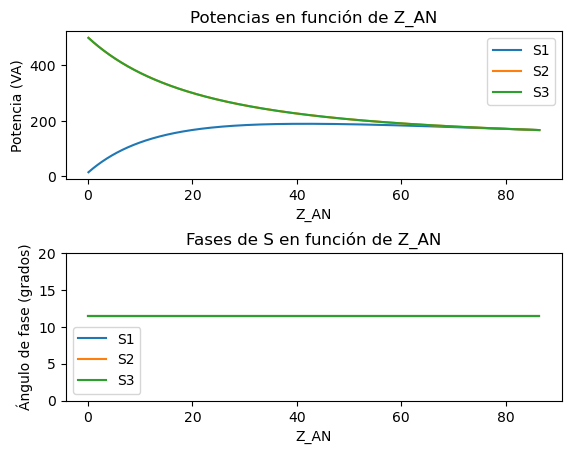

In [188]:
# Calcular las potencias por fase
S1 = V1 * np.conj(I1)
S2 = V2 * np.conj(I2)
S3 = V3 * np.conj(I3)

# Graficar las magnitudes y ángulos de las potencias por fase
fig, axs = plt.subplots(2, 1)
axs[0].plot(z_vect, np.abs(S1), label='S1')
axs[0].plot(z_vect, np.abs(S2), label='S2')
axs[0].plot(z_vect, np.abs(S3), label='S3')
axs[0].set_xlabel('Z_AN')
axs[0].set_ylabel('Potencia (VA)')
axs[0].set_title('Potencias en función de Z_AN')
axs[0].legend()

axs[1].plot(z_vect, np.angle(S1, deg=True), label='S1')
axs[1].plot(z_vect, np.angle(S1, deg=True),  label='S2')
axs[1].plot(z_vect, np.angle(S1, deg=True), label='S3')
axs[1].set_xlabel('Z_AN')
axs[1].set_ylabel('Ángulo de fase (grados)')
axs[1].set_title('Fases de S en función de Z_AN')
axs[1].legend()

# Ajustar el eje y
axs[1].set_ylim(0, 20)

# Agregar espacios entre los subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)